# Anatomical Processing Quality Control
# Jupyter Notebook for checking brain mirroring and registration results

In [8]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting, image
import os

# Configuration
PROCESSED_DIR = '/user_data/csimmon2/long_pt'
MNI_BRAIN = '/opt/fsl/6.0.3/data/standard/MNI152_T1_2mm_brain.nii.gz'

# Subject info - CORRECTED
SUBJECTS_INFO = {
    'sub-004': {'sessions': [1, 2, 3, 5, 6], 'intact_hemi': 'left'},
    'sub-007': {'sessions': [1, 3, 4], 'intact_hemi': 'right'}, 
    'sub-021': {'sessions': [1, 2, 3], 'intact_hemi': 'left'}
}

print("Setup complete!")

Setup complete!


In [9]:
def check_files_exist():
    """Check if all expected files were created"""
    print("=== FILE EXISTENCE CHECK ===\n")
    
    total_sessions = 0
    completed_sessions = 0
    
    for subject_id, info in SUBJECTS_INFO.items():
        print(f"{subject_id} (intact: {info['intact_hemi']}):")
        
        for session in info['sessions']:
            total_sessions += 1
            anat_dir = f'{PROCESSED_DIR}/{subject_id}/ses-{session:02d}/anat'
            
            files_to_check = {
                'Brain': f'{anat_dir}/{subject_id}_ses-{session:02d}_T1w_brain.nii.gz',
                'Mirrored': f'{anat_dir}/{subject_id}_ses-{session:02d}_T1w_brain_mirrored.nii.gz',
                'Registered': f'{anat_dir}/{subject_id}_ses-{session:02d}_T1w_brain_stand.nii.gz',
                'Transform': f'{anat_dir}/anat2stand.mat'
            }
            
            session_complete = True
            status_line = f"  ses-{session:02d}: "
            
            for name, filepath in files_to_check.items():
                if os.path.exists(filepath):
                    status_line += f"{name}✓ "
                else:
                    status_line += f"{name}✗ "
                    session_complete = False
            
            print(status_line)
            if session_complete:
                completed_sessions += 1
    
    print(f"\nSUMMARY: {completed_sessions}/{total_sessions} sessions complete")
    return completed_sessions, total_sessions

completed, total = check_files_exist()

=== FILE EXISTENCE CHECK ===

sub-004 (intact: left):
  ses-01: Brain✓ Mirrored✓ Registered✓ Transform✓ 
  ses-02: Brain✓ Mirrored✓ Registered✓ Transform✓ 
  ses-03: Brain✓ Mirrored✓ Registered✓ Transform✓ 
  ses-05: Brain✓ Mirrored✓ Registered✓ Transform✓ 
  ses-06: Brain✓ Mirrored✓ Registered✓ Transform✓ 
sub-007 (intact: right):
  ses-01: Brain✓ Mirrored✓ Registered✓ Transform✓ 
  ses-03: Brain✓ Mirrored✓ Registered✓ Transform✓ 
  ses-04: Brain✓ Mirrored✓ Registered✓ Transform✓ 
sub-021 (intact: left):
  ses-01: Brain✓ Mirrored✓ Registered✓ Transform✓ 
  ses-02: Brain✓ Mirrored✓ Registered✓ Transform✓ 
  ses-03: Brain✓ Mirrored✓ Registered✓ Transform✓ 

SUMMARY: 11/11 sessions complete



=== MIRRORING CHECK: sub-004 ses-01 ===


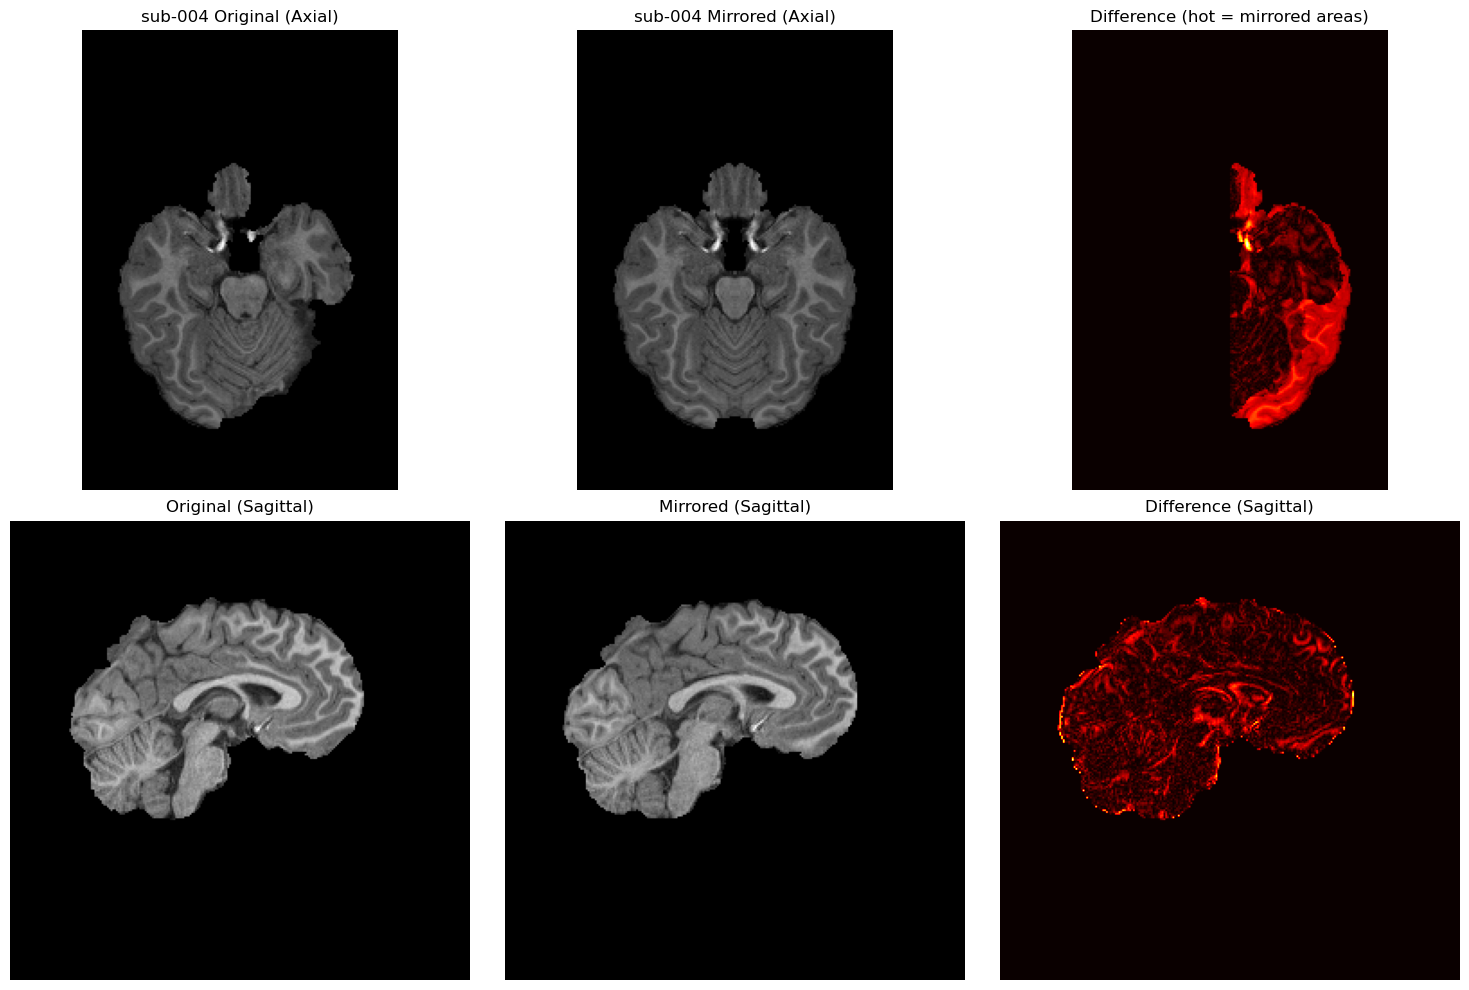

Intact hemisphere: left
Brain shape: (176, 256, 256)
Voxels with differences: 728,007
Max difference: 633.12

=== MIRRORING CHECK: sub-007 ses-01 ===


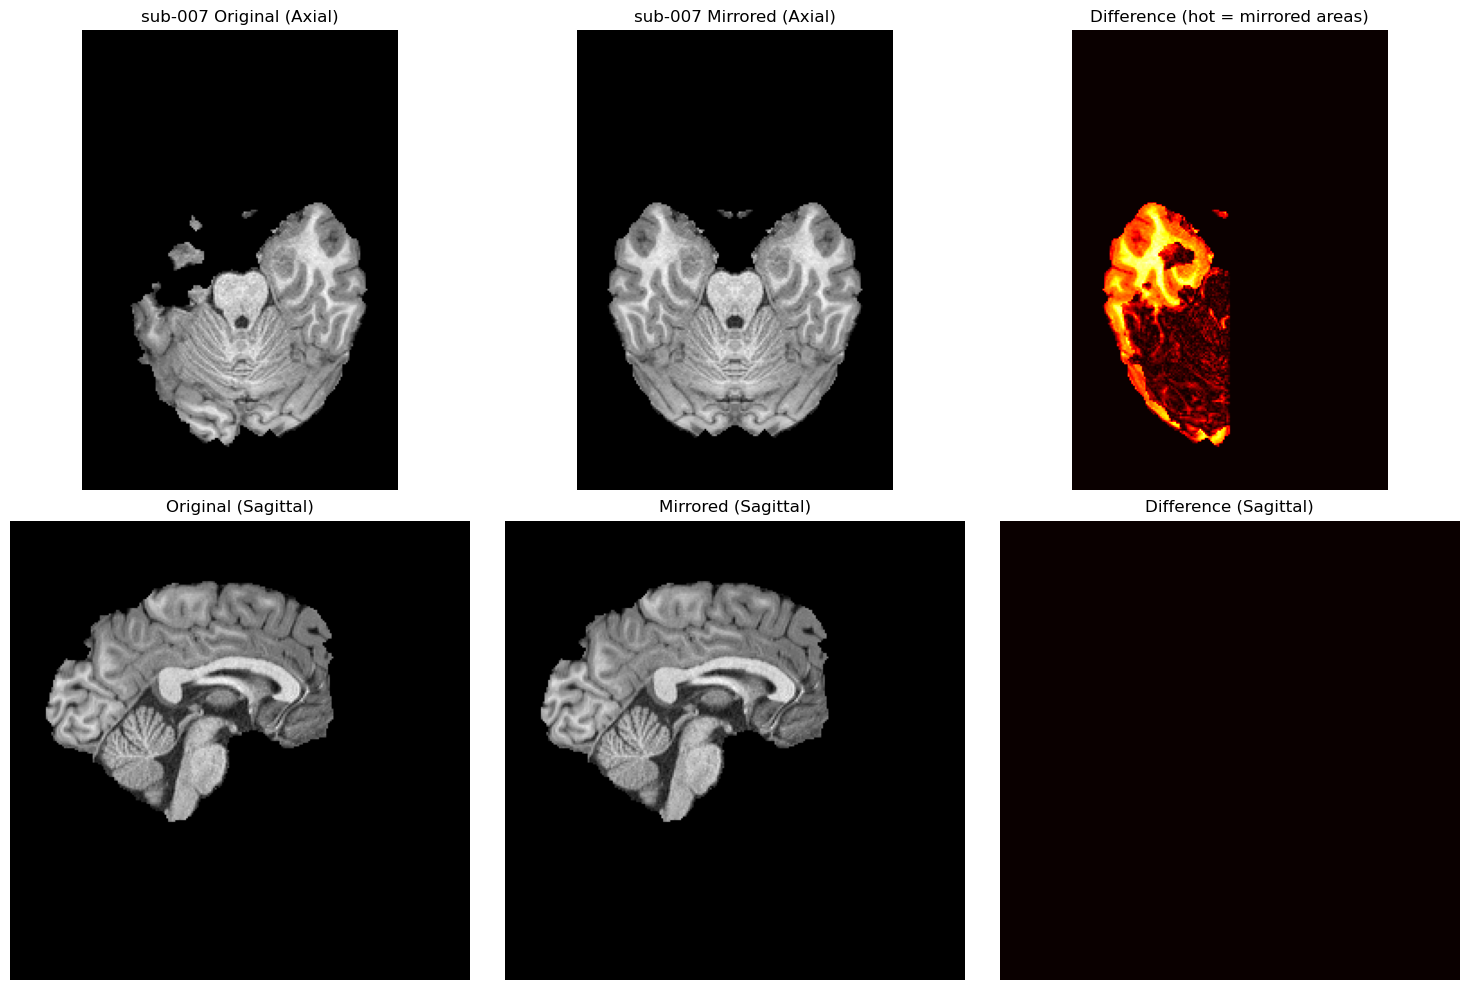

Intact hemisphere: right
Brain shape: (176, 256, 256)
Voxels with differences: 840,047
Max difference: 438.86

=== MIRRORING CHECK: sub-021 ses-01 ===


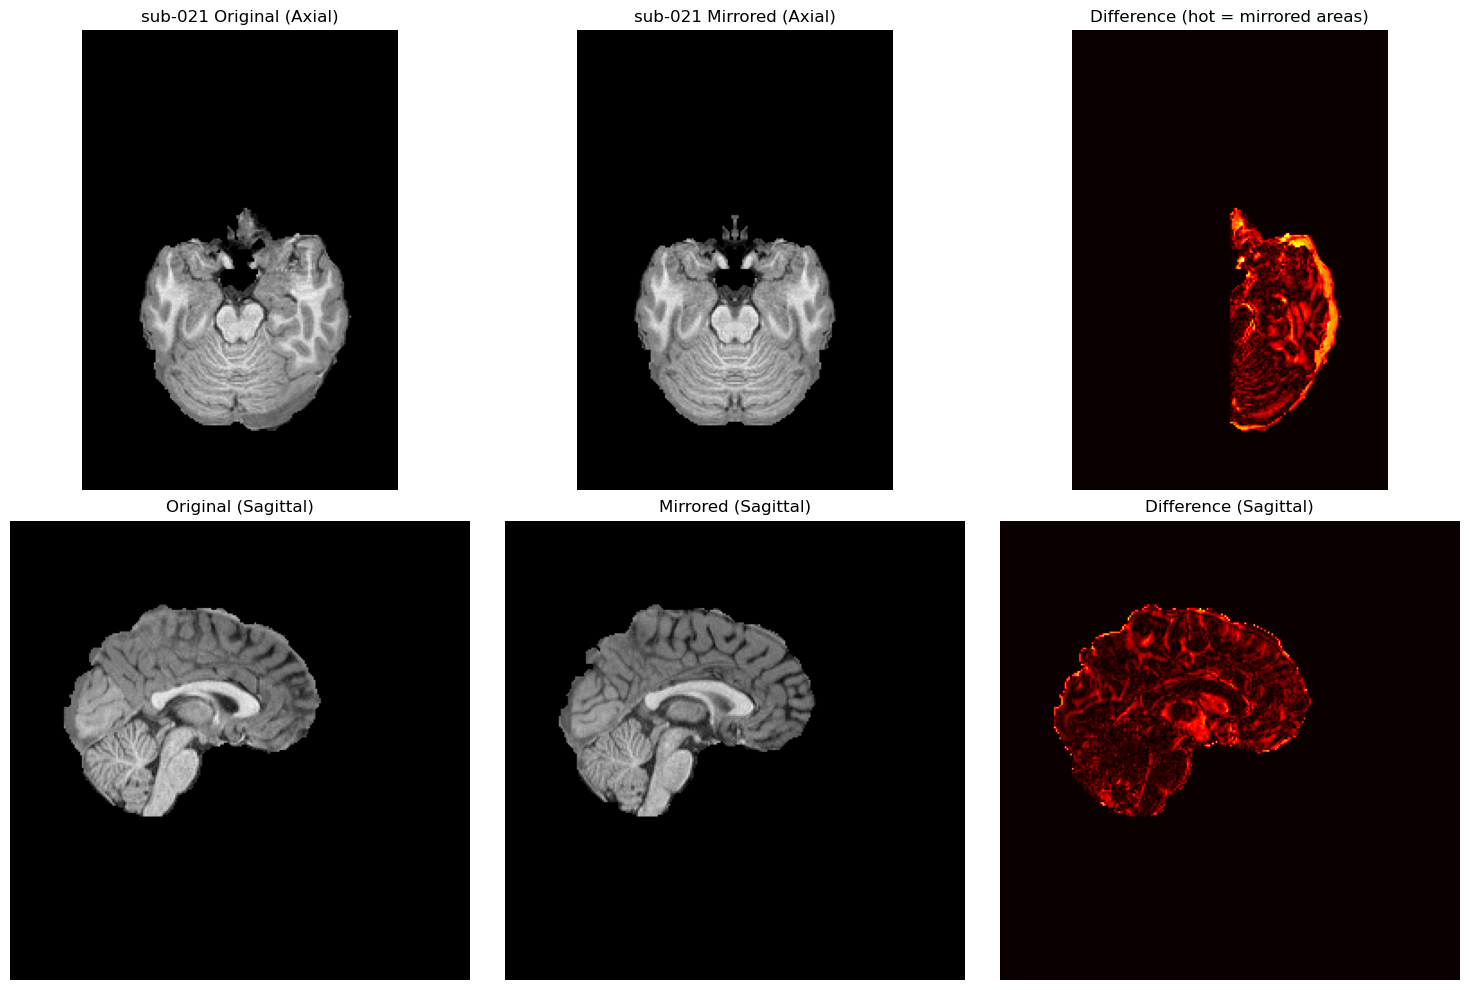

Intact hemisphere: left
Brain shape: (176, 256, 256)
Voxels with differences: 552,218
Max difference: 397.85


In [10]:
def visualize_mirroring(subject_id, session):
    """Visualize original vs mirrored brain"""
    print(f"\n=== MIRRORING CHECK: {subject_id} ses-{session:02d} ===")
    
    anat_dir = f'{PROCESSED_DIR}/{subject_id}/ses-{session:02d}/anat'
    original = f'{anat_dir}/{subject_id}_ses-{session:02d}_T1w_brain.nii.gz'
    mirrored = f'{anat_dir}/{subject_id}_ses-{session:02d}_T1w_brain_mirrored.nii.gz'
    
    if not (os.path.exists(original) and os.path.exists(mirrored)):
        print("Files not found!")
        return
    
    # Load images
    orig_img = nib.load(original)
    mirror_img = nib.load(mirrored)
    orig_data = orig_img.get_fdata()
    mirror_data = mirror_img.get_fdata()
    
    # Get middle slice
    mid_slice = orig_data.shape[2] // 2
    
    # Create visualization
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # Top row: Axial view
    axes[0,0].imshow(orig_data[:, :, mid_slice].T, cmap='gray', origin='lower')
    axes[0,0].set_title(f'{subject_id} Original (Axial)')
    axes[0,0].axis('off')
    
    axes[0,1].imshow(mirror_data[:, :, mid_slice].T, cmap='gray', origin='lower')
    axes[0,1].set_title(f'{subject_id} Mirrored (Axial)')
    axes[0,1].axis('off')
    
    diff = np.abs(orig_data - mirror_data)
    axes[0,2].imshow(diff[:, :, mid_slice].T, cmap='hot', origin='lower')
    axes[0,2].set_title('Difference (hot = mirrored areas)')
    axes[0,2].axis('off')
    
    # Bottom row: Sagittal view
    mid_sag = orig_data.shape[0] // 2
    axes[1,0].imshow(orig_data[mid_sag, :, :].T, cmap='gray', origin='lower')
    axes[1,0].set_title('Original (Sagittal)')
    axes[1,0].axis('off')
    
    axes[1,1].imshow(mirror_data[mid_sag, :, :].T, cmap='gray', origin='lower')
    axes[1,1].set_title('Mirrored (Sagittal)')
    axes[1,1].axis('off')
    
    axes[1,2].imshow(diff[mid_sag, :, :].T, cmap='hot', origin='lower')
    axes[1,2].set_title('Difference (Sagittal)')
    axes[1,2].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print stats
    intact_hemi = SUBJECTS_INFO[subject_id]['intact_hemi']
    print(f"Intact hemisphere: {intact_hemi}")
    print(f"Brain shape: {orig_data.shape}")
    print(f"Voxels with differences: {np.sum(diff > 0.1):,}")
    print(f"Max difference: {np.max(diff):.2f}")

# Check mirroring for each subject's first session
for subject_id in SUBJECTS_INFO.keys():
    first_session = SUBJECTS_INFO[subject_id]['sessions'][0]
    visualize_mirroring(subject_id, first_session)


=== REGISTRATION CHECK: sub-004 ses-01 ===
Registered shape: (91, 109, 91)
MNI template shape: (91, 109, 91)


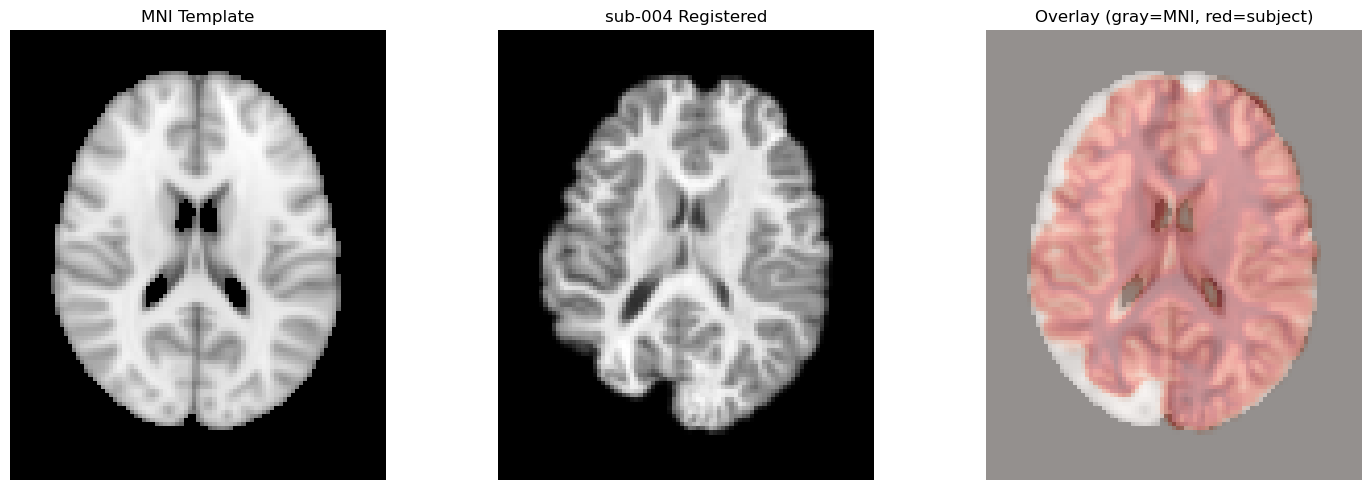


=== REGISTRATION CHECK: sub-007 ses-01 ===
Registered shape: (91, 109, 91)
MNI template shape: (91, 109, 91)


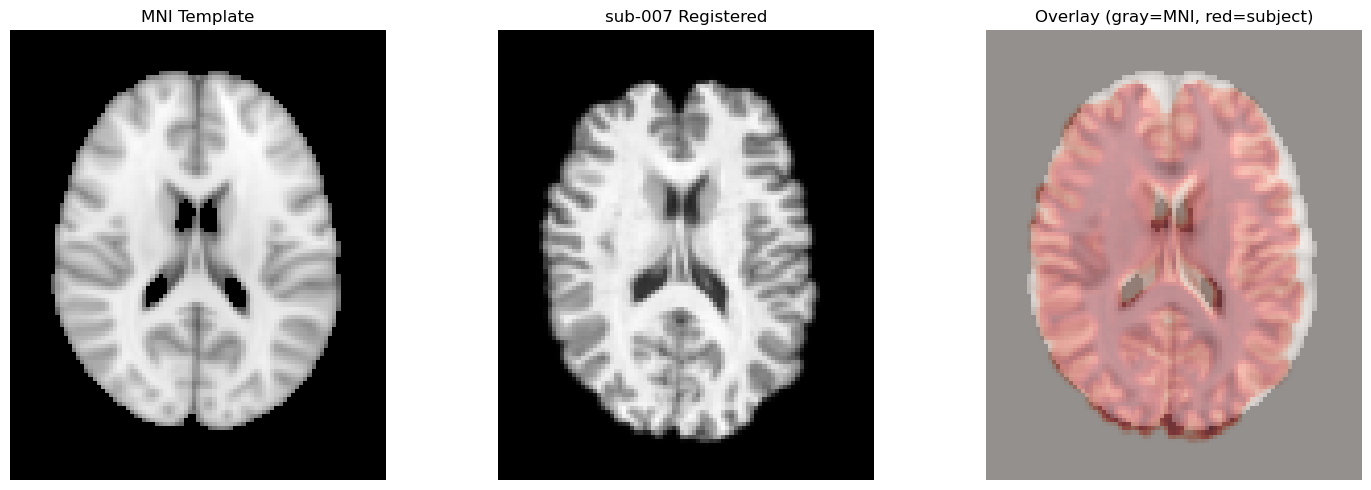


=== REGISTRATION CHECK: sub-021 ses-01 ===
Registered shape: (91, 109, 91)
MNI template shape: (91, 109, 91)


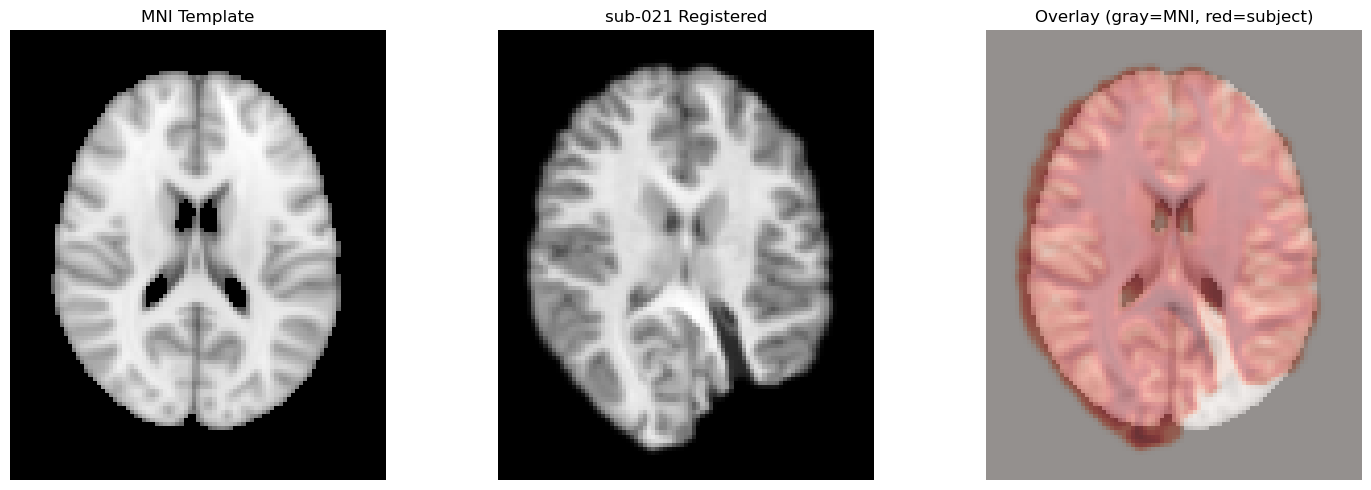

In [11]:
def check_registration(subject_id, session):
    """Check registration to MNI space"""
    print(f"\n=== REGISTRATION CHECK: {subject_id} ses-{session:02d} ===")
    
    anat_dir = f'{PROCESSED_DIR}/{subject_id}/ses-{session:02d}/anat'
    registered = f'{anat_dir}/{subject_id}_ses-{session:02d}_T1w_brain_stand.nii.gz'
    
    if not os.path.exists(registered):
        print("Registered brain not found!")
        return
    
    if not os.path.exists(MNI_BRAIN):
        print("MNI template not found!")
        return
    
    # Load images
    reg_img = nib.load(registered)
    mni_img = nib.load(MNI_BRAIN)
    reg_data = reg_img.get_fdata()
    mni_data = mni_img.get_fdata()
    
    print(f"Registered shape: {reg_data.shape}")
    print(f"MNI template shape: {mni_data.shape}")
    
    # Visualization
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    mid_slice = reg_data.shape[2] // 2
    
    # MNI template
    axes[0].imshow(mni_data[:, :, mid_slice].T, cmap='gray', origin='lower')
    axes[0].set_title('MNI Template')
    axes[0].axis('off')
    
    # Registered brain
    axes[1].imshow(reg_data[:, :, mid_slice].T, cmap='gray', origin='lower')
    axes[1].set_title(f'{subject_id} Registered')
    axes[1].axis('off')
    
    # Overlay
    axes[2].imshow(mni_data[:, :, mid_slice].T, cmap='gray', origin='lower', alpha=0.7)
    axes[2].imshow(reg_data[:, :, mid_slice].T, cmap='Reds', origin='lower', alpha=0.4)
    axes[2].set_title('Overlay (gray=MNI, red=subject)')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()

# Check registration for each subject's first session
for subject_id in SUBJECTS_INFO.keys():
    first_session = SUBJECTS_INFO[subject_id]['sessions'][0]
    check_registration(subject_id, first_session)

In [12]:
def final_assessment():
    """Final quality assessment"""
    print("=== FINAL ASSESSMENT ===\n")
    
    issues = []
    
    for subject_id, info in SUBJECTS_INFO.items():
        print(f"{subject_id}:")
        
        for session in info['sessions']:
            anat_dir = f'{PROCESSED_DIR}/{subject_id}/ses-{session:02d}/anat'
            
            # Check critical files
            transform = f'{anat_dir}/anat2stand.mat'
            mirrored = f'{anat_dir}/{subject_id}_ses-{session:02d}_T1w_brain_mirrored.nii.gz'
            
            if os.path.exists(transform) and os.path.exists(mirrored):
                status = "✓ Ready for FEAT"
            else:
                status = "✗ Issues found"
                issues.append(f"{subject_id} ses-{session:02d}")
            
            print(f"  ses-{session:02d}: {status}")
    
    if not issues:
        print("\n🎉 ALL SUBJECTS READY FOR FEAT ANALYSIS!")
        print("\nNext steps:")
        print("1. Generate .fsf files")
        print("2. Run FEAT first-level analyses")
        print("3. Run FEAT higher-level analyses")
    else:
        print(f"\n⚠️ Issues with: {', '.join(issues)}")
        print("Check processing logs for these sessions.")

final_assessment()

=== FINAL ASSESSMENT ===

sub-004:
  ses-01: ✓ Ready for FEAT
  ses-02: ✓ Ready for FEAT
  ses-03: ✓ Ready for FEAT
  ses-05: ✓ Ready for FEAT
  ses-06: ✓ Ready for FEAT
sub-007:
  ses-01: ✓ Ready for FEAT
  ses-03: ✓ Ready for FEAT
  ses-04: ✓ Ready for FEAT
sub-021:
  ses-01: ✓ Ready for FEAT
  ses-02: ✓ Ready for FEAT
  ses-03: ✓ Ready for FEAT

🎉 ALL SUBJECTS READY FOR FEAT ANALYSIS!

Next steps:
1. Generate .fsf files
2. Run FEAT first-level analyses
3. Run FEAT higher-level analyses
